In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
import datetime

# Langkah ML yang sejauh ini aku pahami
1. EDA = Mengetahui info, type, relasi data<br>
2. Data Cleaning = Mengisi atau menghapus kolom yang punya null values<br>
3. Features Engineering = rescaling, membuat kolom, encoding data 

## EXploratory Data Analysis
Basically untuk MENGETAHUI SERTA MENDAPAT INSIGHT data

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250806130212782461/file.webp">

Caranya dengan mengetahui tipe data, null values, visualisasi baik 1 atau lebih dari 1 hubungan antar variabel
<br>Untuk tahu lebih detil bisa cek sini <a href='https://www.geeksforgeeks.org/data-analysis/what-is-exploratory-data-analysis/'>EDA<href>

Luxury Cosmetics Pop‑Up Events Dataset
A comprehensive, real-world–anchored synthetic dataset capturing 2,133 luxury beauty pop-up events across global retail hotspots. It focuses on limited-edition product drops, experiential formats, and performance KPIs—especially footfall and sell‑through. The data is designed for analytics use cases such as demand forecasting, footfall modeling, merchandising optimization, pricing analysis, and market expansion studies across regions and venue types.<br>
<a href='https://www.kaggle.com/datasets/pratyushpuri/used-car-sales-listings-dataset-2025'>Link Dataset</a><br>

Target kita adalah determine the price

In [15]:
data = pd.read_csv(r"D:\BOOTCAMP\datasets\archive (24)\used_car_listings.csv")

data.head()

listing_id                vin     make     model  year   trim  body_type  \
0           1  9M6LF68V634LY2252    Tesla   Model 3  2019    NaN      Coupe   
1           2  1S0ZCY536BSCY2864   Nissan     Rogue  2024     LT      Sedan   
2           3  YFB625BN0RTMZ5590  Hyundai       i20  2018    XLE  Crossover   
3           4  CPMZ4RFN5WYL37096      Kia  Sportage  2023     EX  Hatchback   
4           5  4PJZG3MV6D9365673      Kia    Seltos  2020  Trend     Pickup   

  fuel_type transmission  mileage    price condition              location  \
0  Electric       Manual    46134  19919.0      good   New Lindsey, GA, US   
1    Hybrid    Automatic    16109  19480.0      good      Pughtown, CO, US   
2    Petrol    Automatic   173239   4556.0      good      Satna, HR, India   
3    Diesel          CVT    36810  11536.0      fair     山武市, Osaka, Japan   
4    Diesel    Automatic    87749  14098.0      good  長生郡長生村, Osaka, Japan   

           seller_type                                           features  
0               Dealer  Alloy Wheels, Android Auto, Apple CarPlay, Fog...  
1               Dealer  Alloy Wheels, Android Auto, Lane Keep Assist, ...  
2               Dealer   Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof  
3  Certified Pre-Owned  Alloy Wheels, Bluetooth, Keyless Entry, Naviga...  
4  Certified Pre-Owned  Apple CarPlay, Backup Camera, Bluetooth, Heate...

In [16]:
print(data.shape)

(2068, 15)


In [17]:
data.info()
#terlihat disini sudah ada missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    2068 non-null   int64  
 1   vin           2068 non-null   object 
 2   make          2068 non-null   object 
 3   model         2068 non-null   object 
 4   year          2068 non-null   int64  
 5   trim          1824 non-null   object 
 6   body_type     2068 non-null   object 
 7   fuel_type     2068 non-null   object 
 8   transmission  2068 non-null   object 
 9   mileage       2068 non-null   int64  
 10  price         2068 non-null   float64
 11  condition     2022 non-null   object 
 12  location      2068 non-null   object 
 13  seller_type   2068 non-null   object 
 14  features      1917 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 242.5+ KB


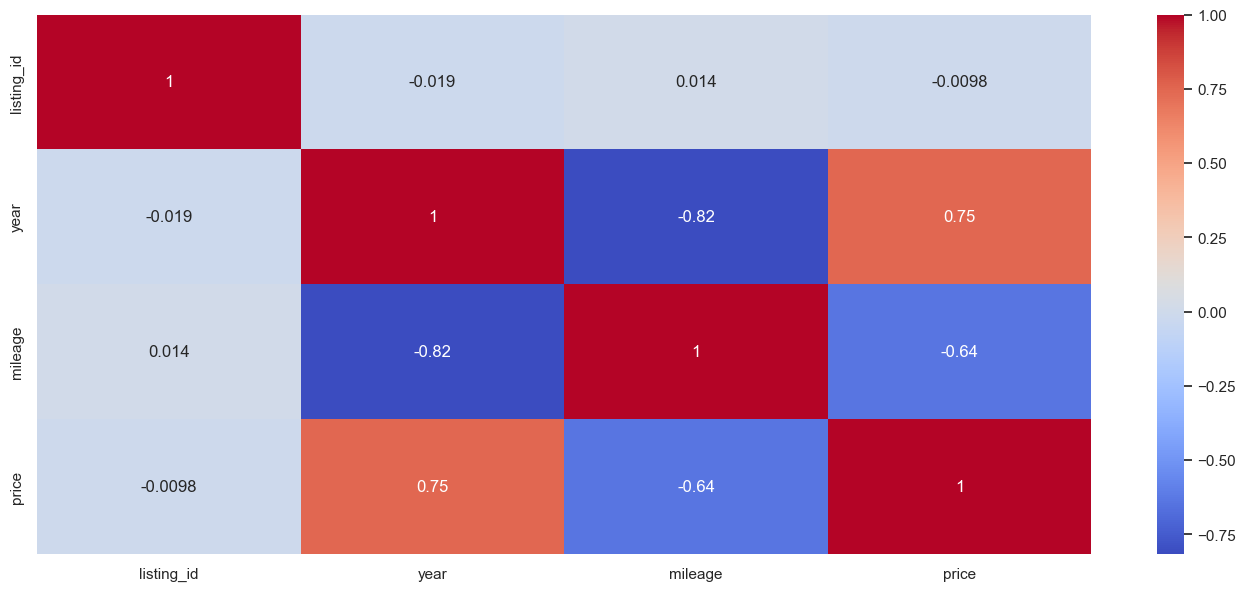

In [18]:
fig, ax = plt.subplots(figsize=(17,7))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [19]:
data.describe()

listing_id         year        mileage         price
count  2068.000000  2068.000000    2068.000000   2068.000000
mean   1034.500000  2016.975822  115626.364603   9182.621857
std     597.124498     4.610981   80971.112603   9964.093618
min       1.000000  2005.000000       0.000000   1140.000000
25%     517.750000  2014.000000   57683.250000   2323.750000
50%    1034.500000  2017.000000   99212.000000   5448.500000
75%    1551.250000  2020.000000  159291.500000  11946.750000
max    2068.000000  2025.000000  418428.000000  72641.000000

In [20]:
data.isnull().sum()

listing_id        0
vin               0
make              0
model             0
year              0
trim            244
body_type         0
fuel_type         0
transmission      0
mileage           0
price             0
condition        46
location          0
seller_type       0
features        151
dtype: int64

In [21]:
data['trim'].value_counts()

trim
Touring        113
LX             109
Titanium       104
Long Range     102
Sport          102
Base           101
LTZ             99
Trend           98
LE              96
Platinum        96
EX              96
Limited         94
SE              93
Performance     91
Premium         88
L               88
LT              87
XSE             84
XLE             83
Name: count, dtype: int64

In [22]:
data['condition'].value_counts()

condition
good         816
excellent    609
fair         361
like new     100
salvage       93
new           43
Name: count, dtype: int64

<Axes: xlabel='make', ylabel='count'>

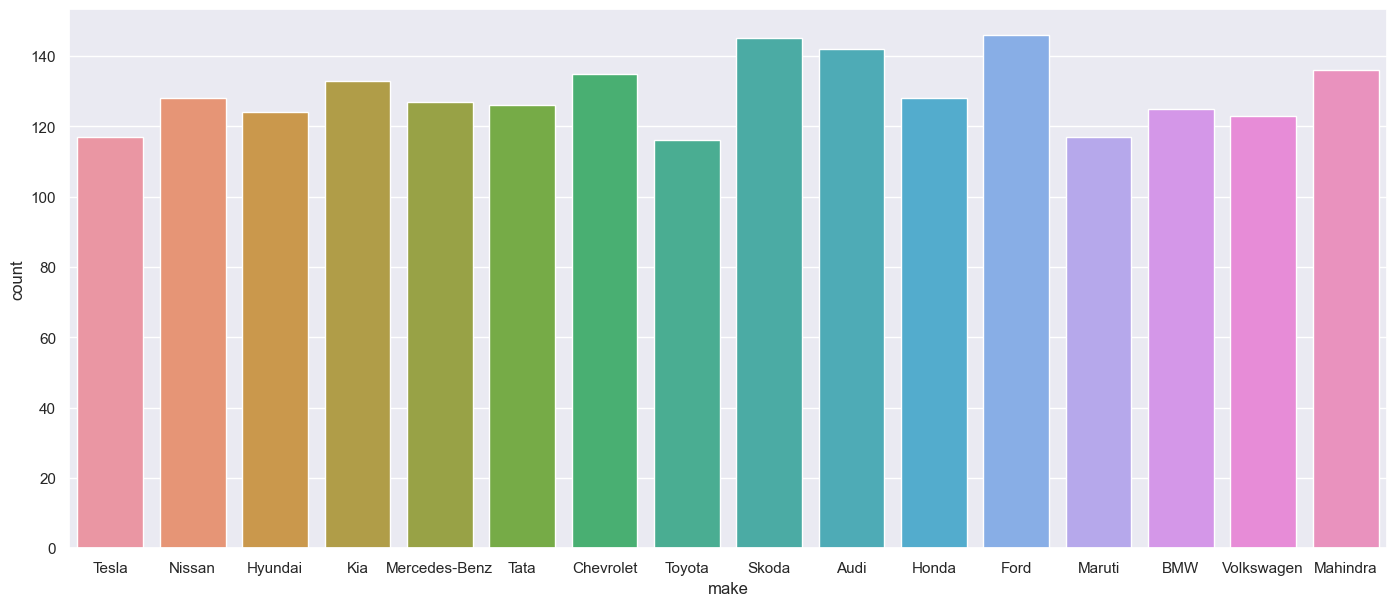

In [23]:
#COUNTPLOT digunakan untuk melihat total jumlah (lebih baik digunakan untuk data diskrit)
fig, ax = plt.subplots(figsize=(17,7))
sns.countplot(data=data, x='make', ax=ax)


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Dell\AppData

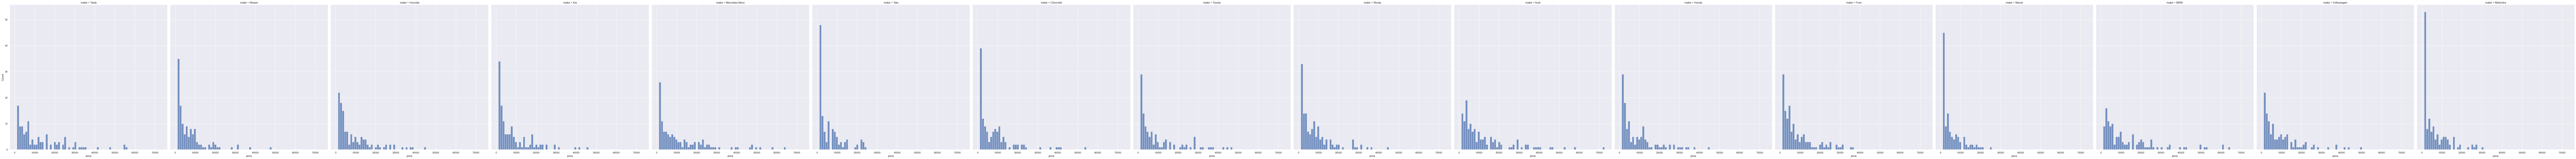

In [24]:
sns.displot(data=data, x='price', col='make', kind='hist', bins=70,
    height=10,
    aspect=1)

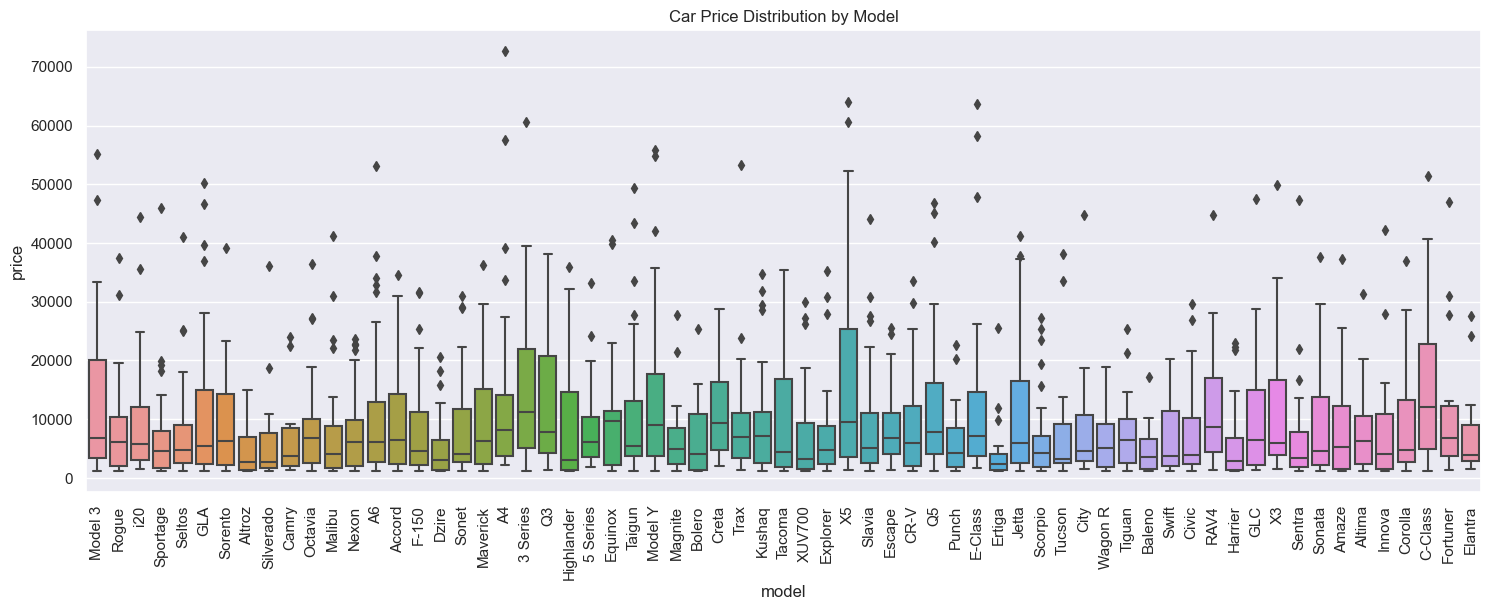

In [25]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data, x="model", y="price")
plt.xticks(rotation=90)
plt.title("Car Price Distribution by Model")
plt.show()


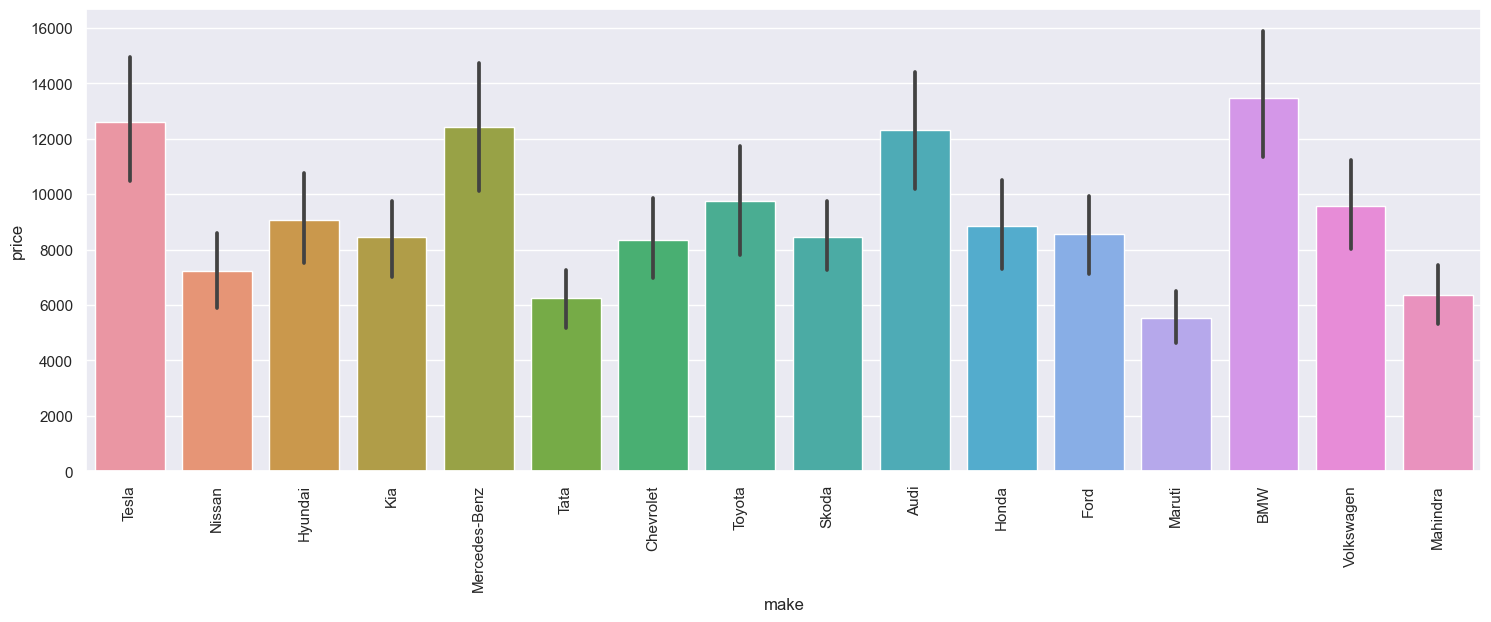

In [26]:
plt.figure(figsize=(18,6))
sns.barplot(data=data, x="make", y="price", estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

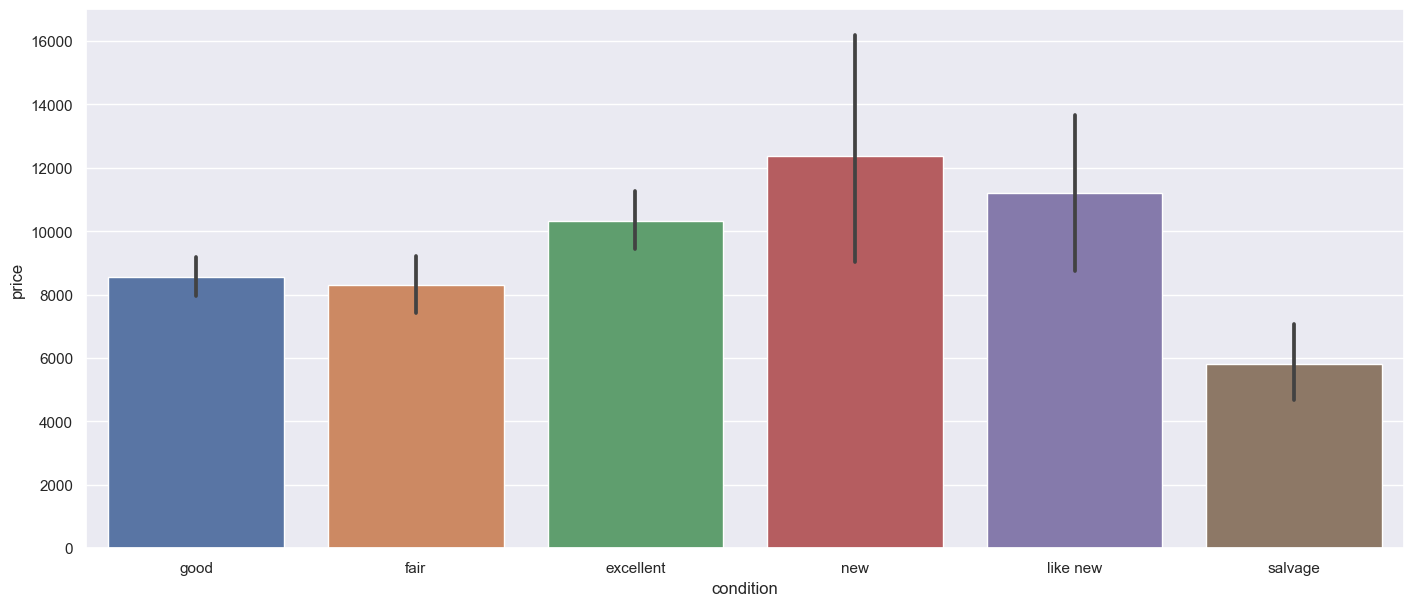

In [27]:
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(y='price', x='condition', estimator=np.mean, data=data);

# sns.countplot(data=data, x='condition', ax=ax)

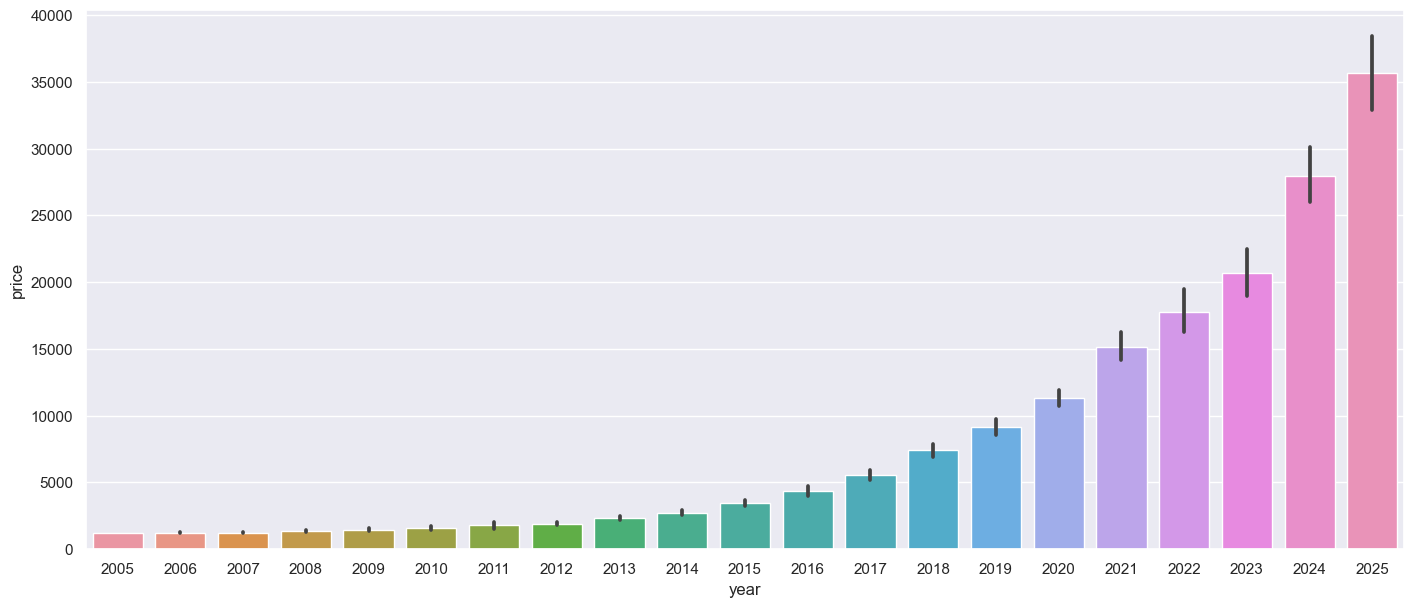

In [28]:
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(y='price', x='year', estimator=np.mean, data=data);

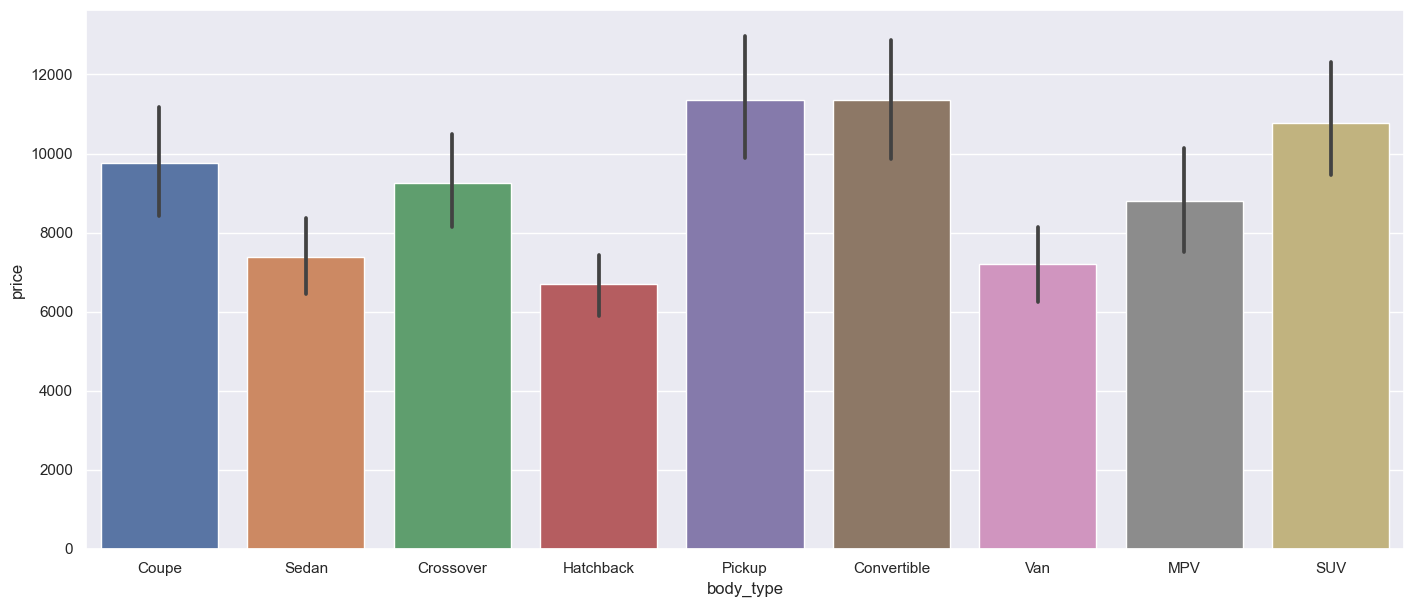

In [29]:
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(x='body_type', y='price', estimator=np.mean, data=data);

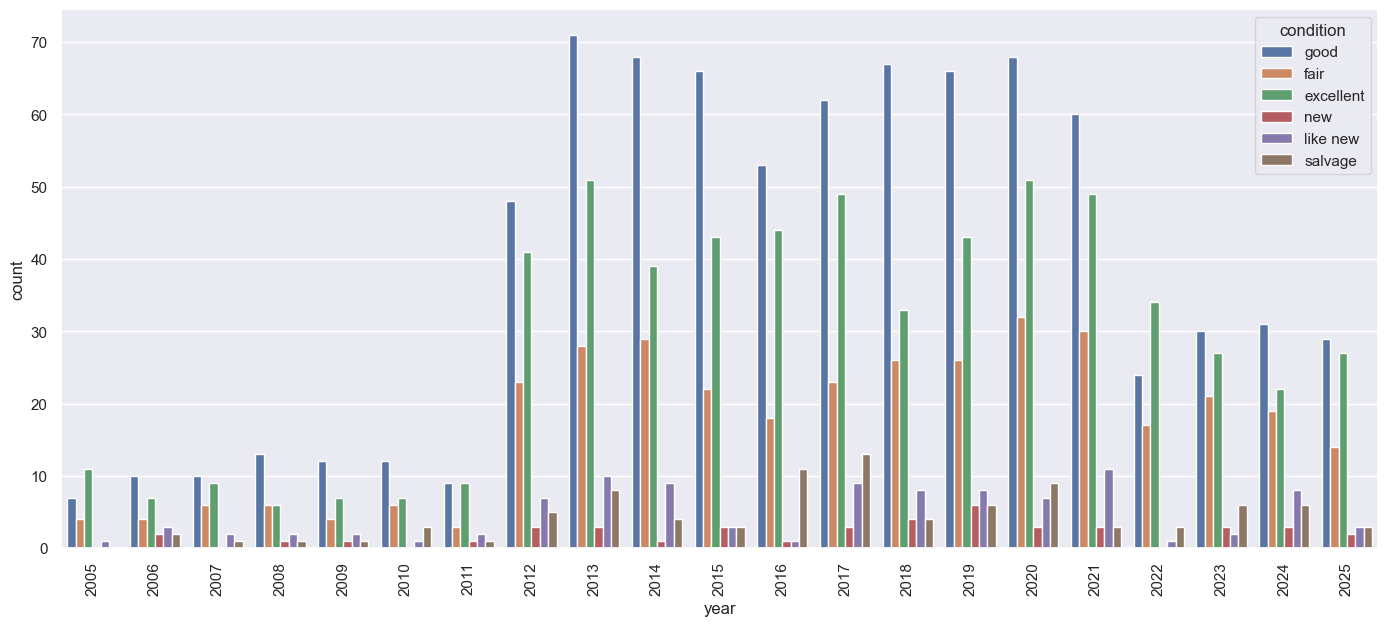

In [30]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x='year', hue='condition')
plt.xticks(rotation=90)
plt.show()

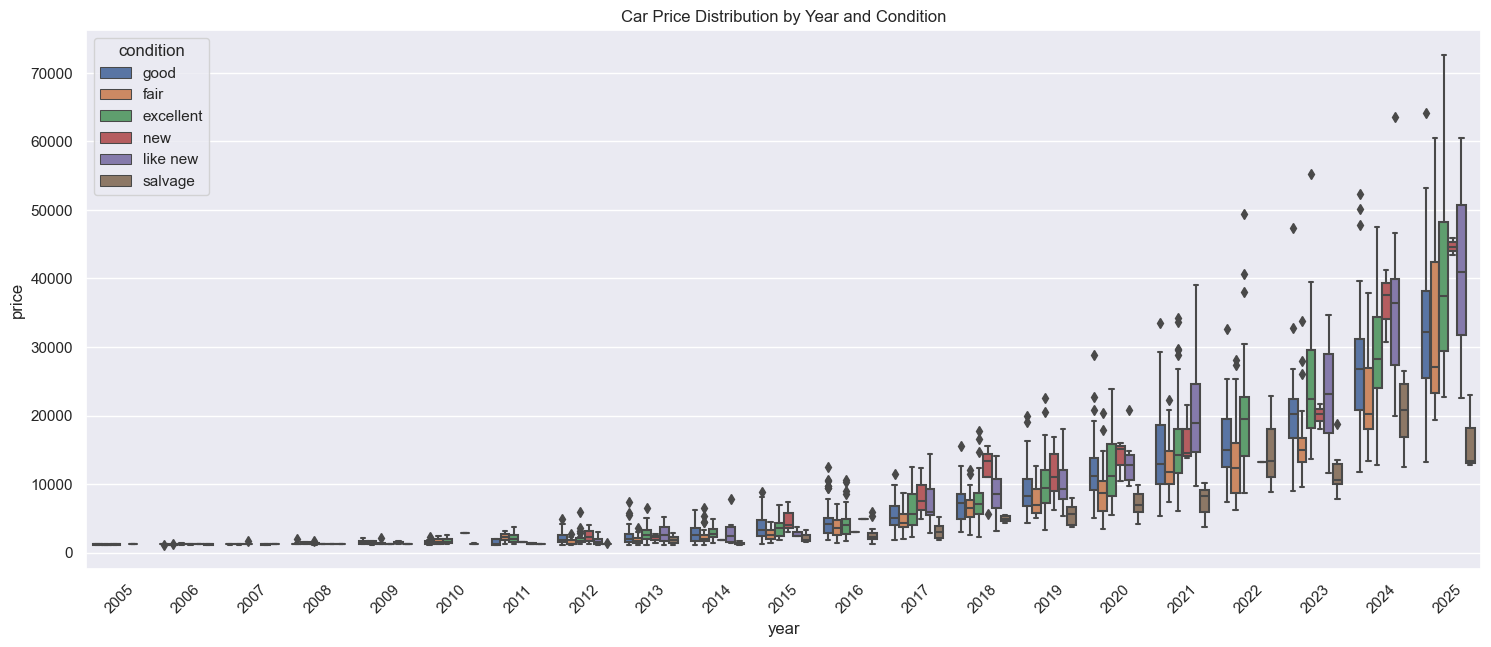

In [31]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data, x="year", y="price", hue="condition")
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Year and Condition")
plt.show()


In [34]:
data[['City','State','Country']] = data['location'].str.split(',',n=2, expand=True)
data.drop(columns='location', inplace=True)
data

listing_id                vin       make     model  year      trim  \
0              1  9M6LF68V634LY2252      Tesla   Model 3  2019       NaN   
1              2  1S0ZCY536BSCY2864     Nissan     Rogue  2024        LT   
2              3  YFB625BN0RTMZ5590    Hyundai       i20  2018       XLE   
3              4  CPMZ4RFN5WYL37096        Kia  Sportage  2023        EX   
4              5  4PJZG3MV6D9365673        Kia    Seltos  2020     Trend   
...          ...                ...        ...       ...   ...       ...   
2063        2064  06B83BVF8F2W81547      Skoda    Kushaq  2023     Sport   
2064        2065  4P7083L79MBVK5696   Mahindra   Scorpio  2016       XSE   
2065        2066  5RERFW1M7B00A4061       Audi        A6  2018        EX   
2066        2067  DJB6DBAS5UNNX0757      Skoda    Kushaq  2021        LX   
2067        2068  8BUANECR64R9L0827  Chevrolet    Malibu  2024  Platinum   

      body_type fuel_type transmission  mileage    price  condition  \
0         Coupe  Electric       Manual    46134  19919.0       good   
1         Sedan    Hybrid    Automatic    16109  19480.0       good   
2     Crossover    Petrol    Automatic   173239   4556.0       good   
3     Hatchback    Diesel          CVT    36810  11536.0       fair   
4        Pickup    Diesel    Automatic    87749  14098.0       good   
...         ...       ...          ...      ...      ...        ...   
2063     Pickup    Petrol    Automatic    24566  34696.0   like new   
2064        SUV    Diesel    Automatic   122459   2642.0  excellent   
2065  Hatchback    Diesel          DCT   120452   7093.0       good   
2066        MPV    Petrol       Manual    57043  11296.0  excellent   
2067      Sedan    Diesel    Automatic    20218  23558.0  excellent   

              seller_type                                           features  \
0                  Dealer  Alloy Wheels, Android Auto, Apple CarPlay, Fog...   
1                  Dealer  Alloy Wheels, Android Auto, Lane Keep Assist, ...   
2                  Dealer   Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof   
3     Certified Pre-Owned  Alloy Wheels, Bluetooth, Keyless Entry, Naviga...   
4     Certified Pre-Owned  Apple CarPlay, Backup Camera, Bluetooth, Heate...   
...                   ...                                                ...   
2063  Certified Pre-Owned  Blind Spot Monitor, Keyless Entry, Panoramic R...   
2064               Dealer  Adaptive Cruise Control, Backup Camera, LED He...   
2065        Private Party  Adaptive Cruise Control, Android Auto, Blind S...   
2066  Certified Pre-Owned  Backup Camera, Panoramic Roof, Parking Sensors...   
2067  Certified Pre-Owned  Adaptive Cruise Control, Android Auto, Apple C...   

              City   State   Country  
0      New Lindsey      GA        US  
1         Pughtown      CO        US  
2            Satna      HR     India  
3              山武市   Osaka     Japan  
4           長生郡長生村   Osaka     Japan  
...            ...     ...       ...  
2063  Shahjahanpur      KA     India  
2064       Marques      PR    Brazil  
2065       Dhanbad      KL     India  
2066   Caitlinstad      NL    Canada  
2067     Stadtroda      HH   Germany  

[2068 rows x 17 columns]

In [35]:
data.drop(columns=['trim', 'features','vin','seller_type','City','State', 'listing_id'], inplace=True)
data['condition'].fillna(method='ffill', inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_12072\896951768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['condition'].fillna(method='ffill', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12072\896951768.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['condition'].fillna(method='ffill', inplace=True)


## Feature Scaling
Basically proses mengubah raw data -> fitur yang berguna -> agar model mempelajra dengan baik dan tidak overfit<br>
Proses nya<br>
<p style = "color: red">1. Feature Creation: Feature creation involves generating new features from domain knowledge or by observing patterns in the data.</p> It can be:
Domain-specific: Created based on industry knowledge like business rules.
Data-driven: Derived by recognizing patterns in data.
Synthetic: Formed by combining existing features.<br><br>

<p style = "color: red">2. Feature Transformation: Transformation adjusts features to improve model learning:
Normalization & Scaling: Adjust the range of features for consistency.</p>
Encoding: Converts categorical data to numerical form i.e one-hot encoding.
Mathematical transformations: Like logarithmic transformations for skewed data.  

<p style = "color: red">3. Feature Extraction: Extracting meaningful features can reduce dimensionality and improve model accuracy:</p>
Dimensionality reduction: Techniques like PCA reduce features while preserving important information.
Aggregation & Combination: Summing or averaging features to simplify the model.  

<p style = "color: red">4. Feature Selection: Feature selection involves choosing a subset of relevant features to use:
Filter methods: Based on statistical measures like correlation.</p>
Wrapper methods: Select based on model performance.
Embedded methods: Feature selection integrated within model training.

<p style = "color: red">5. Feature Scaling: Scaling ensures that all features contribute equally to the model:</p>
Min-Max scaling: Rescales values to a fixed range like 0 to 1.
Standard scaling: Normalizes to have a mean of 0 and variance of 1.

In [36]:
current_year = datetime.datetime.now().year
data['car_age'] = current_year - data['year']

data['mileage_per_year'] = (data['mileage']/data['car_age'].replace(0,1)).round(2) #artinya jika umur mobil 0 akan diganti 1 untuk menghindari NAN

In [37]:
data.isnull().sum()

make                0
model               0
year                0
body_type           0
fuel_type           0
transmission        0
mileage             0
price               0
condition           0
Country             0
car_age             0
mileage_per_year    0
dtype: int64

In [38]:
data.duplicated().sum()

0

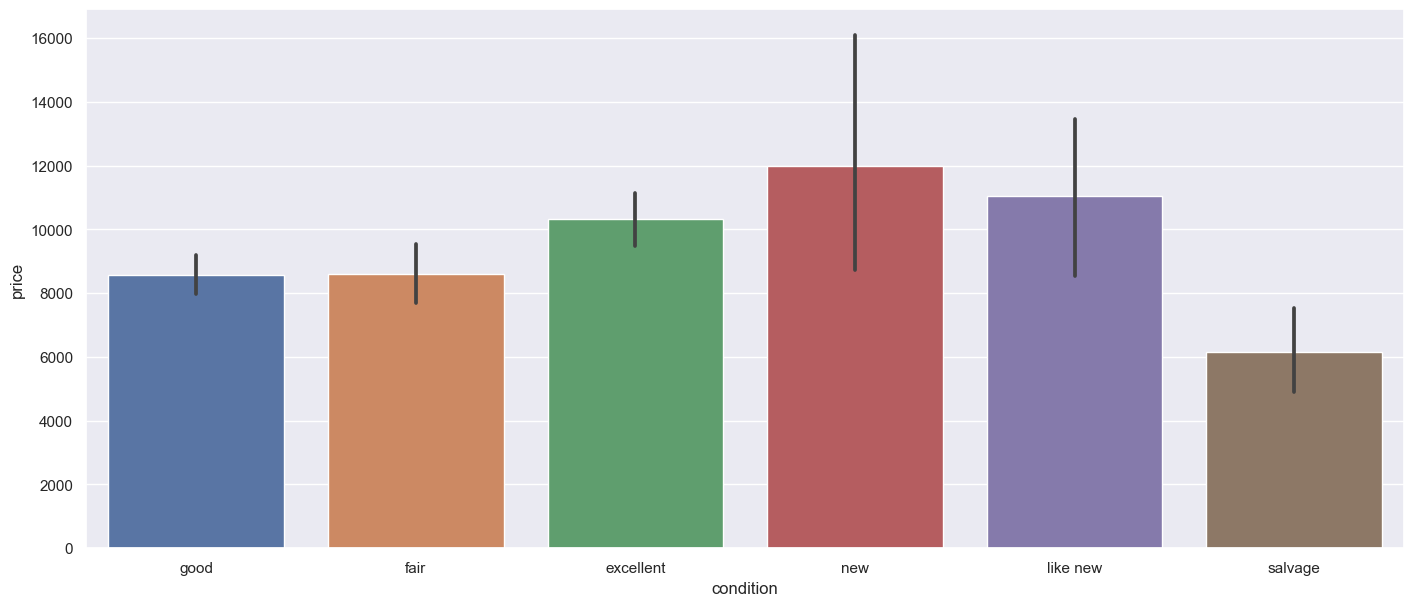

In [39]:
fig, ax = plt.subplots(figsize=(17,7))
sns.barplot(y='price', x='condition', estimator=np.mean, data=data);

# sns.countplot(data=data, x='condition', ax=ax)

In [40]:
data

make     model  year  body_type fuel_type transmission  mileage  \
0         Tesla   Model 3  2019      Coupe  Electric       Manual    46134   
1        Nissan     Rogue  2024      Sedan    Hybrid    Automatic    16109   
2       Hyundai       i20  2018  Crossover    Petrol    Automatic   173239   
3           Kia  Sportage  2023  Hatchback    Diesel          CVT    36810   
4           Kia    Seltos  2020     Pickup    Diesel    Automatic    87749   
...         ...       ...   ...        ...       ...          ...      ...   
2063      Skoda    Kushaq  2023     Pickup    Petrol    Automatic    24566   
2064   Mahindra   Scorpio  2016        SUV    Diesel    Automatic   122459   
2065       Audi        A6  2018  Hatchback    Diesel          DCT   120452   
2066      Skoda    Kushaq  2021        MPV    Petrol       Manual    57043   
2067  Chevrolet    Malibu  2024      Sedan    Diesel    Automatic    20218   

        price  condition   Country  car_age  mileage_per_year  
0     19919.0       good        US        6           7689.00  
1     19480.0       good        US        1          16109.00  
2      4556.0       good     India        7          24748.43  
3     11536.0       fair     Japan        2          18405.00  
4     14098.0       good     Japan        5          17549.80  
...       ...        ...       ...      ...               ...  
2063  34696.0   like new     India        2          12283.00  
2064   2642.0  excellent    Brazil        9          13606.56  
2065   7093.0       good     India        7          17207.43  
2066  11296.0  excellent    Canada        4          14260.75  
2067  23558.0  excellent   Germany        1          20218.00  

[2068 rows x 12 columns]

In [41]:
data.drop(['year', 'mileage'], axis=1, inplace=True)

In [42]:
#Encoding untuk type object
data.select_dtypes('object')

make     model  body_type fuel_type transmission  condition  \
0         Tesla   Model 3      Coupe  Electric       Manual       good   
1        Nissan     Rogue      Sedan    Hybrid    Automatic       good   
2       Hyundai       i20  Crossover    Petrol    Automatic       good   
3           Kia  Sportage  Hatchback    Diesel          CVT       fair   
4           Kia    Seltos     Pickup    Diesel    Automatic       good   
...         ...       ...        ...       ...          ...        ...   
2063      Skoda    Kushaq     Pickup    Petrol    Automatic   like new   
2064   Mahindra   Scorpio        SUV    Diesel    Automatic  excellent   
2065       Audi        A6  Hatchback    Diesel          DCT       good   
2066      Skoda    Kushaq        MPV    Petrol       Manual  excellent   
2067  Chevrolet    Malibu      Sedan    Diesel    Automatic  excellent   

       Country  
0           US  
1           US  
2        India  
3        Japan  
4        Japan  
...        ...  
2063     India  
2064    Brazil  
2065     India  
2066    Canada  
2067   Germany  

[2068 rows x 7 columns]

## Cek Skewness
Disini pake limit 0.75
<p style="color: red;">Biasanya pada data yang float DAN DILAKUKAN SEBELUM MENGUBAH CATEGORICAL MENJADI NUMERIK</p>

In [44]:
# Step 1: Calculate skewness
skewness = data.select_dtypes(include='number').skew()

# Step 2: Select columns with skew > 0.75
skew_cols = skewness[skewness > 0.75].index

# 👉 Display column names and skewness values before transformation
print("Columns to transform (skew > 0.75):")
print(skewness[skewness > 0.75])

Columns to transform (skew > 0.75):
price    2.146626
dtype: float64


In [45]:
# Step 3: Apply log1p only on those columns
for col in skew_cols:
    data[col] = np.log1p(data[col])


In [46]:
for col in data.select_dtypes('object'):
    print(f"------{col}------")
    print(data[col].value_counts())
    print()


------make------
make
Ford             146
Skoda            145
Audi             142
Mahindra         136
Chevrolet        135
Kia              133
Nissan           128
Honda            128
Mercedes-Benz    127
Tata             126
BMW              125
Hyundai          124
Volkswagen       123
Tesla            117
Maruti           117
Toyota           116
Name: count, dtype: int64

------model------
model
Model 3       60
Model Y       57
Octavia       56
Bolero        53
Slavia        48
              ..
Camry         17
Highlander    16
RAV4          15
Fortuner      14
Tacoma        12
Name: count, Length: 65, dtype: int64

------body_type------
body_type
Crossover      263
Hatchback      239
SUV            239
Van            233
Convertible    232
Pickup         231
Sedan          217
Coupe          209
MPV            205
Name: count, dtype: int64

------fuel_type------
fuel_type
Petrol            916
Diesel            407
Hybrid            281
Electric          225
CNG            

In [47]:
# Make a copy
data2 = data.copy()

# --- OneHot encode selected categorical columns ---
onehot_cols = ['body_type', 'make', 'model', 'fuel_type', 'transmission', 'Country']
oht_enc = OneHotEncoder(drop="first", sparse=False)

# Fit-transform
one_hot_encoded = oht_enc.fit_transform(data2[onehot_cols])

# Create dataframe with new encoded column names
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=oht_enc.get_feature_names_out(onehot_cols),
                          index=data2.index)

# Drop original cols and join encoded
data2 = pd.concat([data2.drop(onehot_cols, axis=1), one_hot_df], axis=1)


# --- Ordinal encode 'condition' column ---
ordi_enc = OrdinalEncoder()
data2['condition'] = ordi_enc.fit_transform(data2[['condition']])


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
data2['condition'].unique()

array([2., 1., 0., 4., 3., 5.])

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='mileage_per_year'>

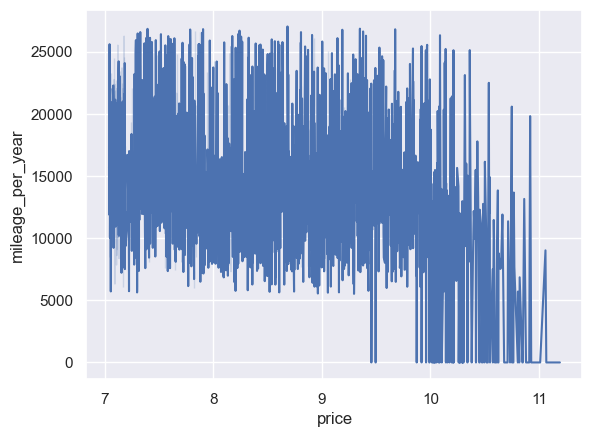

In [49]:
sns.lineplot(data=data2, x='price', y='mileage_per_year')

In [50]:
data2.sort_values(by='price', ascending=False).head(10)

price  condition  car_age  mileage_per_year  body_type_Coupe  \
1478  11.193299        0.0        0               0.0              0.0   
1008  11.067997        2.0        0               0.0              0.0   
731   11.060290        3.0        1            9014.0              0.0   
225   11.011522        3.0        0               0.0              0.0   
1927  11.010861        1.0        0               0.0              0.0   
89    10.970712        1.0        0               0.0              0.0   
1879  10.959610        0.0        0               0.0              0.0   
249   10.928973        0.0        0               0.0              0.0   
391   10.919044        0.0        2           19806.5              0.0   
750   10.910734        1.0        0               0.0              0.0   

      body_type_Crossover  body_type_Hatchback  body_type_MPV  \
1478                  0.0                  0.0            0.0   
1008                  0.0                  0.0            0.0   
731                   0.0                  0.0            0.0   
225                   1.0                  0.0            0.0   
1927                  0.0                  0.0            0.0   
89                    0.0                  0.0            0.0   
1879                  1.0                  0.0            0.0   
249                   0.0                  0.0            1.0   
391                   0.0                  0.0            0.0   
750                   0.0                  0.0            0.0   

      body_type_Pickup  body_type_SUV  ...  transmission_Manual  \
1478               0.0            0.0  ...                  1.0   
1008               0.0            1.0  ...                  0.0   
731                1.0            0.0  ...                  0.0   
225                0.0            0.0  ...                  0.0   
1927               0.0            0.0  ...                  0.0   
89                 1.0            0.0  ...                  0.0   
1879               0.0            0.0  ...                  0.0   
249                0.0            0.0  ...                  1.0   
391                1.0            0.0  ...                  0.0   
750                0.0            0.0  ...                  0.0   

      Country_ Brazil  Country_ Canada  Country_ France  Country_ Germany  \
1478              1.0              0.0              0.0               0.0   
1008              0.0              0.0              0.0               0.0   
731               1.0              0.0              0.0               0.0   
225               0.0              0.0              0.0               0.0   
1927              0.0              1.0              0.0               0.0   
89                1.0              0.0              0.0               0.0   
1879              0.0              0.0              0.0               0.0   
249               0.0              1.0              0.0               0.0   
391               0.0              0.0              0.0               0.0   
750               0.0              0.0              0.0               0.0   

      Country_ India  Country_ Japan  Country_ South Africa  Country_ UK  \
1478             0.0             0.0                    0.0          0.0   
1008             1.0             0.0                    0.0          0.0   
731              0.0             0.0                    0.0          0.0   
225              0.0             0.0                    1.0          0.0   
1927             0.0             0.0                    0.0          0.0   
89               0.0             0.0                    0.0          0.0   
1879             0.0             1.0                    0.0          0.0   
249              0.0             0.0                    0.0          0.0   
391              1.0             0.0                    0.0          0.0   
750              0.0             0.0                    0.0          1.0   

      Country_ US  
1478          0.0  
1008          0.

In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Columns: 109 entries, price to Country_ US
dtypes: float64(108), int64(1)
memory usage: 1.7 MB


## Modeling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
x = data2.drop('price', axis=1)
y = data2['price']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=56)

In [54]:
print(xtrain.shape, xtest.shape,ytrain.shape, ytest.shape)

(1447, 108) (621, 108) (1447,) (621,)


In [55]:
linr = LinearRegression()
# logr = LogisticRegression()
rfr = RandomForestRegressor()
xgb = XGBRegressor()

linr.fit(xtrain, ytrain)
# logr.fit(xtrain, ytrain)
rfr.fit(xtrain, ytrain)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [56]:
ypred_linr = linr.predict(xtest)
# ypred_logr = logr.predict(xtest)
ypred_rfr = rfr.predict(xtest)
ypred_xgb = xgb.predict(xtest)

In [57]:
mse = mean_squared_error(ytest, ypred_linr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred_linr)
r2 = r2_score(ytest, ypred_linr)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 0.20
RMSE: 0.27
R2 Score: 0.93


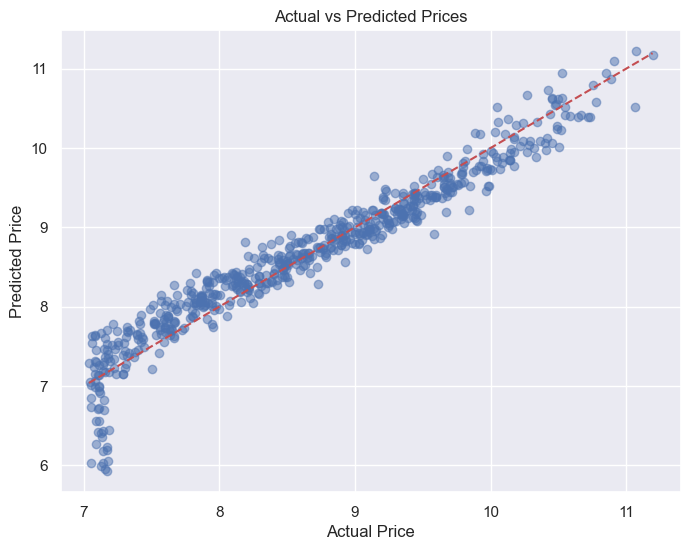

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(ytest, ypred_linr, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [ ]:
# mse = mean_squared_error(ytest, ypred_logr)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(ytest, ypred_logr)
# r2 = r2_score(ytest, ypred_logr)

# print(f"MAE: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"R2 Score: {r2:.2f}")

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8,6))
# plt.scatter(ytest, ypred_logr, alpha=0.5)
# plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual vs Predicted Prices")
# plt.show()


In [59]:
mse = mean_squared_error(ytest, ypred_rfr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred_rfr)
r2 = r2_score(ytest, ypred_rfr)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 0.20
RMSE: 0.27
R2 Score: 0.93


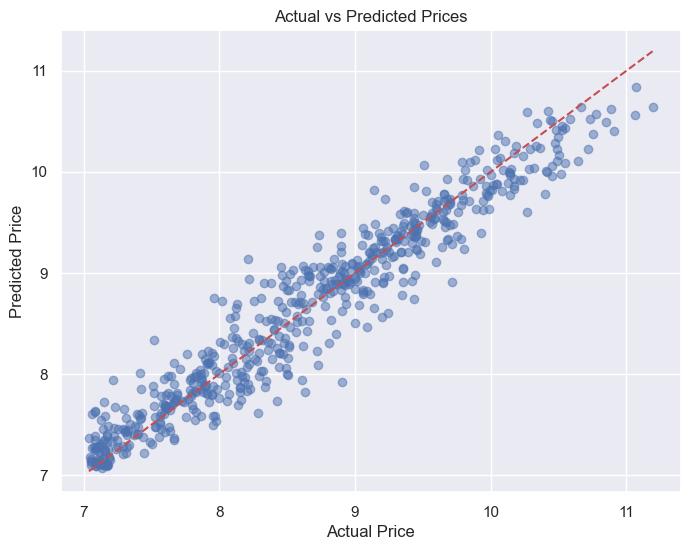

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(ytest, ypred_rfr, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [61]:
mse = mean_squared_error(ytest, ypred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred_xgb)
r2 = r2_score(ytest, ypred_xgb)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 0.13
RMSE: 0.18
R2 Score: 0.97


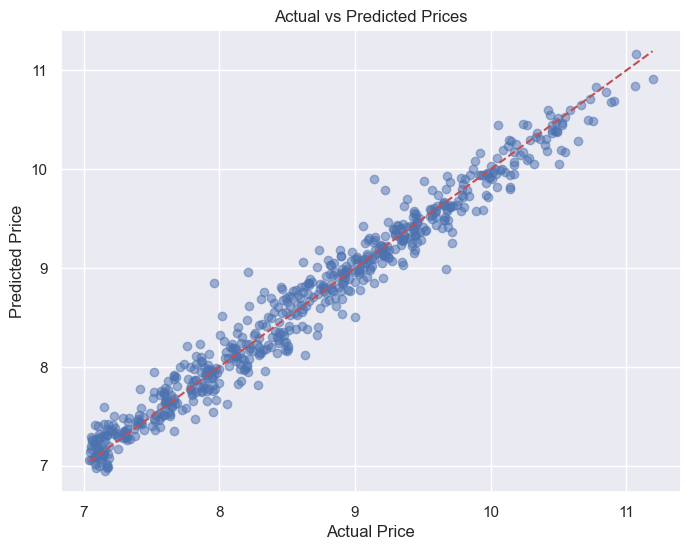

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(ytest, ypred_xgb, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [63]:
# Inverse-transform
ytest_real = np.expm1(ytest)       # back to original price
ypred_real = np.expm1(ypred_xgb)   # back to original price

# Recalculate metrics
mse = mean_squared_error(ytest_real, ypred_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest_real, ypred_real)
r2 = r2_score(ytest_real, ypred_real)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 1220.59
RMSE: 2344.89
R2 Score: 0.95


In [64]:
fig, ax = plt.subplots(figsize=(200,100))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

So kalo kita lihat dari heatmap, <br>
Yang berkorelasi TESLA model Y dan model 3 ini harganya lumayan<br>
So we try to know more<br>

Kesimpulannya adalah Model XGBOOST punya akurasi 97% dengan MAE = 0.13  <br>
artinya, kesalahan error nya sangat minim

In [65]:
sample_input = xtest.iloc[[2]]  
pred_log = xgb.predict(sample_input)
pred_real = np.expm1(pred_log)  # inverse transform if you used log1p
print(pred_real.shape)

actual_log = ytest.iloc[2]
actual_real = np.expm1(actual_log)
print(f"Predicted value: {pred_real[0]:.2f}")
print(f'Actual Price: {actual_real:.2f}')

(1,)
Predicted value: 23227.71
Actual Price: 30269.00
